In [2]:
from utils import *
from fastai.vision.all import *
%matplotlib inline

In [3]:
flowers = URLs.FLOWERS
flowers

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-102-flowers.tgz'

In [4]:
path = untar_data(flowers)
path.ls()

(#4) [Path('/storage/data/oxford-102-flowers/valid.txt'),Path('/storage/data/oxford-102-flowers/train.txt'),Path('/storage/data/oxford-102-flowers/jpg'),Path('/storage/data/oxford-102-flowers/test.txt')]

In [5]:
Path.BASE_PATH = path
path.ls()

(#4) [Path('valid.txt'),Path('train.txt'),Path('jpg'),Path('test.txt')]

In [6]:
!pip install tree
!tree -d {path}

     |████████████████████████████████| 66 kB 8.0 MB/s  eta 0:00:01
     |████████████████████████████████| 82 kB 2.9 MB/s  eta 0:00:01
  Created wheel for tree: filename=Tree-0.2.4-py3-none-any.whl size=7878 sha256=26450c98ac427e2ae074180567450594281a016fa981bea3def04269deeb263a
  Stored in directory: /root/.cache/pip/wheels/74/04/0b/a001c55dfd026a1231c74a4cdad4929c144352c4d8d744ad89
Successfully built tree
/bin/bash: tree: command not found


In [7]:
files = get_image_files(path/'jpg')
files

(#8189) [Path('jpg/image_07659.jpg'),Path('jpg/image_05084.jpg'),Path('jpg/image_01872.jpg'),Path('jpg/image_05735.jpg'),Path('jpg/image_02802.jpg'),Path('jpg/image_05563.jpg'),Path('jpg/image_08138.jpg'),Path('jpg/image_05854.jpg'),Path('jpg/image_02779.jpg'),Path('jpg/image_06314.jpg')...]

<AxesSubplot:>

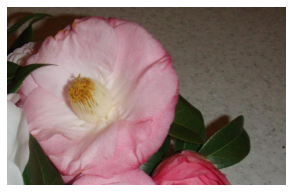

In [8]:
img = PILImage.create(files[0])
img.show()

In [9]:
train = pd.read_csv(path/'train.txt', header=None, sep=' ')
train.head() #head displays the first 5 rows of the dataframe

0   1
0  jpg/image_03860.jpg  16
1  jpg/image_06092.jpg  13
2  jpg/image_02400.jpg  42
3  jpg/image_02852.jpg  55
4  jpg/image_07710.jpg  96

In [10]:
cols = ['name', 'label']
train.columns = cols
train.head()


name  label
0  jpg/image_03860.jpg     16
1  jpg/image_06092.jpg     13
2  jpg/image_02400.jpg     42
3  jpg/image_02852.jpg     55
4  jpg/image_07710.jpg     96

In [11]:
valid = pd.read_csv(path/'valid.txt', sep=" ", names= cols )
# test df
test = pd.read_csv(path/'test.txt', sep=" ", names= cols )
valid.head()

name  label
0  jpg/image_04467.jpg     89
1  jpg/image_07129.jpg     44
2  jpg/image_05166.jpg      4
3  jpg/image_07002.jpg     34
4  jpg/image_02007.jpg     79

In [12]:
print(f"The number of images in training set are:{len(train)}")
print(f"The number of images in validation set are:{len(valid)}")
print(f"The number of images in test set are:{len(valid)}")

The number of images in training set are:1020
The number of images in validation set are:1020
The number of images in test set are:1020


In [13]:
df = pd.concat([train, valid, test], axis=0)
df.head()


name  label
0  jpg/image_03860.jpg     16
1  jpg/image_06092.jpg     13
2  jpg/image_02400.jpg     42
3  jpg/image_02852.jpg     55
4  jpg/image_07710.jpg     96

In [31]:
df.to_csv(r'C:\Users\Neo\Downloads\export_dataframe.csv', index = False, header=True)
print(df)

                     name  label
0     jpg/image_03860.jpg     16
1     jpg/image_06092.jpg     13
2     jpg/image_02400.jpg     42
3     jpg/image_02852.jpg     55
4     jpg/image_07710.jpg     96
...                   ...    ...
6144  jpg/image_08168.jpg     61
6145  jpg/image_07487.jpg     94
6146  jpg/image_04432.jpg     89
6147  jpg/image_02532.jpg     75
6148  jpg/image_00178.jpg     76

[8189 rows x 2 columns]


In [48]:
labels = pd.read_csv(r'flowers.txt', header=None, names = ['labels'])
labels['labels'] = labels['labels'].apply(lambda x: x.replace("'", ""))
labels.head()

labels
0               pink primrose
1   hard-leaved pocket orchid
2            canterbury bells
3                   sweet pea
4            english marigold

In [49]:
labels_dict = dict(zip(list(range(len(labels))), labels['labels']))

In [50]:
df['class'] = df['label'].apply(lambda x: labels_dict[x])
df.head()

name  label                class
0  jpg/image_03860.jpg     16    purple coneflower
1  jpg/image_06092.jpg     13        spear thistle
2  jpg/image_02400.jpg     42           sword lily
3  jpg/image_02852.jpg     55   bishop of llandaff
4  jpg/image_07710.jpg     96               mallow

In [51]:
def get_x(r): return path/r['name']
def get_y(r): return r['class']

dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   splitter=RandomSplitter(seed=42),
                   get_x= get_x,
                   get_y= get_y, 
                   item_tfms = Resize(224))
dls = dblock.dataloaders(df)

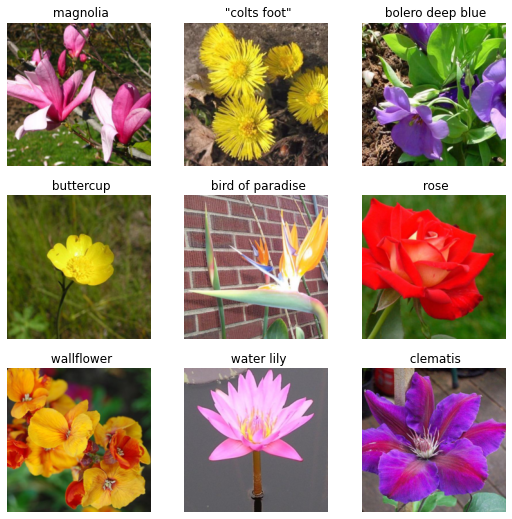

In [52]:
dls.show_batch()

In [53]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [54]:
learn.summary()

Sequential (Input shape: ['64 x 3 x 224 x 224'])
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               64 x 64 x 112 x 112  9,408      False     
________________________________________________________________
BatchNorm2d          64 x 64 x 112 x 112  128        True      
________________________________________________________________
ReLU                 64 x 64 x 112 x 112  0          False     
________________________________________________________________
MaxPool2d            64 x 64 x 56 x 56    0          False     
________________________________________________________________
Conv2d               64 x 64 x 56 x 56    36,864     False     
________________________________________________________________
BatchNorm2d          64 x 64 x 56 x 56    128        True      
________________________________________________________________
ReLU                 64 x 64 x 56 x 56    0          False     
_________________________________________________

In [55]:
learn.fine_tune(2)

In [56]:
learn.save('flowers-baseline')

Path('models/flowers-baseline.pth')